In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt #для графиков
import math # для функции RMSE

In [3]:
#загрузим модель
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
path = r'C:\Users\1\Desktop\Магистратура в ИТМО\Диссертация магистра\Работа 2 семестр\Compo_PTRNZHG_A_PTRNZHG_A_test.xlsx'

In [5]:
dataframe = pd.read_excel(path, skiprows = 3) #пропусти первые три строчки при помощи skiprows

In [6]:
def RMSE(X,y):
    list_score = []
    for i in range(len(y)):
        score = (X[i] - y[i])**2
        list_score.append(score)

    result = math.sqrt(sum(list_score)/len(y))
    return result

def MAE(X,y):
    list_score = []
    for i in range(len(y)):
        score = abs(X[i] - y[i])
        list_score.append(score)

    result = sum(list_score)/len(y)
    return result

In [7]:
#надо выбрать данные по одной скважине без пропусков dataframe_AA564G = dataframe[dataframe[dataframe_columns[0]] == first_label_list[0]]

# Предобработка. Для удобного доступа к данным найдем кол-во уникальных значений колонок в dataframe_columns

In [8]:
dataframe_columns = dataframe.columns

In [9]:
first_label_list = dataframe[dataframe_columns[0]].unique()

In [10]:
first_label_list

array(['xxxAA564G', 'xxxAA684G'], dtype=object)

In [11]:
dataframe_AA564G = dataframe[dataframe[dataframe_columns[0]] == first_label_list[0]]

In [12]:
dataframe_AA564G

,Unnamed: 0,Unnamed: 1,m,v/v,v/v.1,uR/h,v/v.2,v/v.3,v/v.4,mD,...,m/hr,ohmm,ohmm.1,ohmm.2,ohmm.3,ohmm.4,ohmm.5,ohmm.6,unitless.2,m.1
0,xxxAA564G,PTRNZHG_A,3150.0,0.853487,0.643186,72.630,NaN,NaN,NaN,NaN,...,21.760,-9999.00000,-9999.00000,-9999.00000,-9999.00000,NaN,0.126063,0.126192,NaN,2586.927278
1,xxxAA564G,PTRNZHG_A,3150.1,0.853487,0.680297,70.315,NaN,NaN,NaN,NaN,...,17.380,-9999.00000,-9999.00000,-9999.00000,-9999.00000,NaN,0.126063,0.126192,NaN,2586.943175
2,xxxAA564G,PTRNZHG_A,3150.2,0.853487,0.717407,68.000,NaN,NaN,NaN,NaN,...,13.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,NaN,0.126063,0.126191,NaN,2586.959072
3,xxxAA564G,PTRNZHG_A,3150.3,0.853487,0.706106,68.705,NaN,NaN,NaN,NaN,...,18.720,-9999.00000,-9999.00000,-9999.00000,-9999.00000,NaN,0.126063,0.126191,NaN,2586.974953
4,xxxAA564G,PTRNZHG_A,3150.4,0.853487,0.694804,69.410,NaN,NaN,NaN,NaN,...,24.440,-9999.00000,-9999.00000,-9999.00000,-9999.00000,NaN,0.126063,0.126190,NaN,2586.990833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,xxxAA564G,PTRNZHG_A,4061.6,0.954645,-9999.000000,-9999.000,NaN,NaN,NaN,NaN,...,29.880,53.27999,55.20000,40.71000,46.00999,NaN,0.125888,0.125894,NaN,2598.676835
9117,xxxAA564G,PTRNZHG_A,4061.7,0.954645,-9999.000000,-9999.000,NaN,NaN,NaN,NaN,...,25.855,50.85480,53.35932,39.51238,43.76525,NaN,0.125888,0.125894,NaN,2598.674285
9118,xxxAA564G,PTRNZHG_A,4061.8,0.954645,-9999.000000,-9999.000,NaN,NaN,NaN,NaN,...,21.830,48.54000,51.58001,38.35000,41.63000,NaN,0.125888,0.125894,NaN,2598.671736
9119,xxxAA564G,PTRNZHG_A,4061.9,0.954645,-9999.000000,-9999.000,NaN,NaN,NaN,NaN,...,19.445,47.67733,50.71780,36.99092,40.17974,NaN,0.125888,-9999.000000,NaN,2598.669179


# Фильтрация данных (необходимо убрать строчки с пропусками NaN и -9999)

In [13]:
dataframe_AA564G_first = dataframe_AA564G.drop(axis=1, labels = (dataframe_AA564G.columns[0]), )\
.drop(axis=1, labels = (dataframe_AA564G.columns[1]))\
[['m','v/v','v/v.1','uR/h','ohmm','ohmm.1','ohmm.2','ohmm.3','ohmm.5','ohmm.6','unitless','unitless.1']]\
.reset_index(drop=True)

In [14]:
dataframe_AA564G_first

,m,v/v,v/v.1,uR/h,ohmm,ohmm.1,ohmm.2,ohmm.3,ohmm.5,ohmm.6,unitless,unitless.1
0,3150.0,0.853487,0.643186,72.630,-9999.00000,-9999.00000,-9999.00000,-9999.00000,0.126063,0.126192,-9999,-9999
1,3150.1,0.853487,0.680297,70.315,-9999.00000,-9999.00000,-9999.00000,-9999.00000,0.126063,0.126192,-9999,-9999
2,3150.2,0.853487,0.717407,68.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,0.126063,0.126191,-9999,-9999
3,3150.3,0.853487,0.706106,68.705,-9999.00000,-9999.00000,-9999.00000,-9999.00000,0.126063,0.126191,-9999,-9999
4,3150.4,0.853487,0.694804,69.410,-9999.00000,-9999.00000,-9999.00000,-9999.00000,0.126063,0.126190,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...
9116,4061.6,0.954645,-9999.000000,-9999.000,53.27999,55.20000,40.71000,46.00999,0.125888,0.125894,6,0
9117,4061.7,0.954645,-9999.000000,-9999.000,50.85480,53.35932,39.51238,43.76525,0.125888,0.125894,6,0
9118,4061.8,0.954645,-9999.000000,-9999.000,48.54000,51.58001,38.35000,41.63000,0.125888,0.125894,6,0
9119,4061.9,0.954645,-9999.000000,-9999.000,47.67733,50.71780,36.99092,40.17974,0.125888,-9999.000000,6,0


In [15]:
dataframe_edited_X = dataframe_AA564G_first.loc[dataframe_AA564G_first['unitless.1'] >= 0]\
.loc[dataframe_AA564G_first['unitless'] >= 0]\
.loc[dataframe_AA564G_first['ohmm'] >= 0]\
.loc[dataframe_AA564G_first['ohmm.1'] >= 0]\
.loc[dataframe_AA564G_first['ohmm.2'] >= 0]\
.loc[dataframe_AA564G_first['ohmm.3'] >= 0]\
.loc[dataframe_AA564G_first['ohmm.5'] >= 0]\
.loc[dataframe_AA564G_first['ohmm.6'] >= 0]\
.loc[dataframe_AA564G_first['uR/h'] >= 0]\
.loc[dataframe_AA564G_first['v/v.1'] >= 0]\
.loc[dataframe_AA564G_first['v/v'] >= 0]\
.reset_index(drop=True)

In [16]:
# import matplotlib.pyplot as plt ##для проверки колонки с глубинной 
# plt.plot(np.array(dataframe_edited_X['m']))

# Посмотрим на графики геоданных с скважины AA564G

In [17]:
features = dataframe_edited_X.drop(axis = 1, labels = 'm').columns

In [18]:
#Визуализация
def draft_images(name_column,data_x,data_y):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.set_title(f"Зависимость {name_column} от измеренной глубины", fontsize=12)
  ax.set_xlabel("Глубина в метрах", fontsize=12)        
  ax.set_ylabel(f"Значения {name_column} в базовой систем единиц", fontsize=12)
  ax.plot(data_x, data_y, label=name_column)
  ax.legend(loc="upper left")
  plt.show()

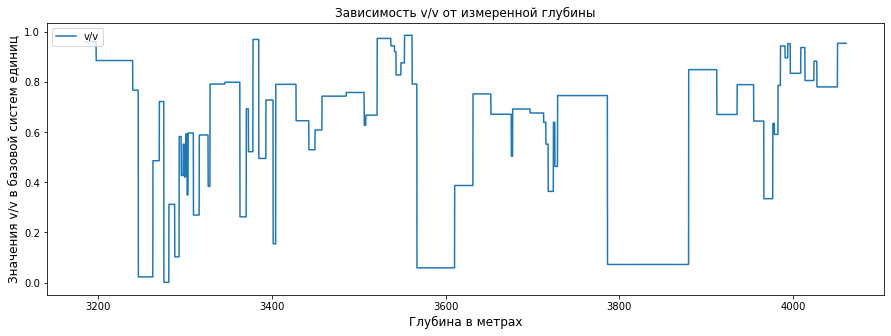

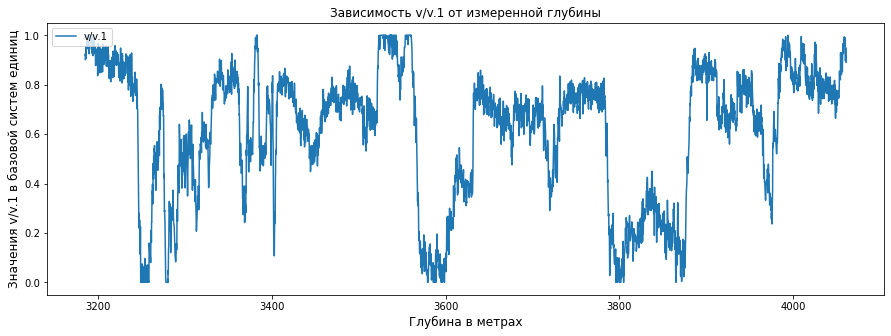

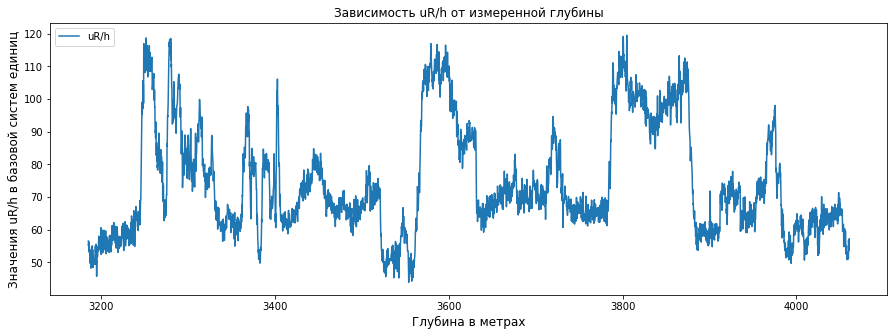

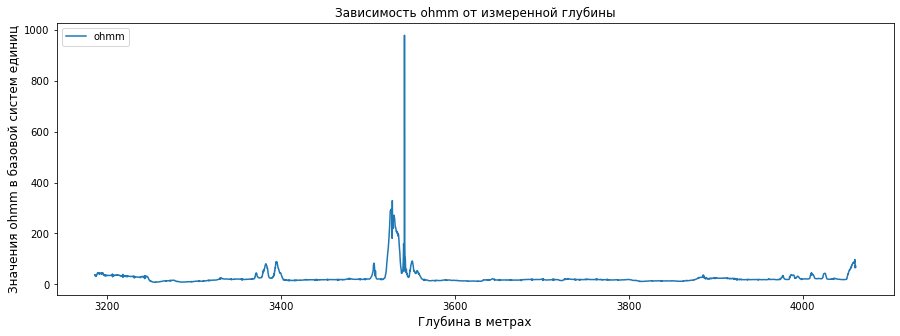

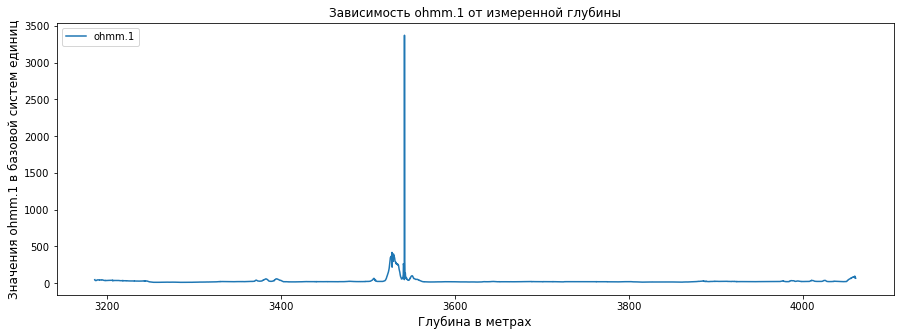

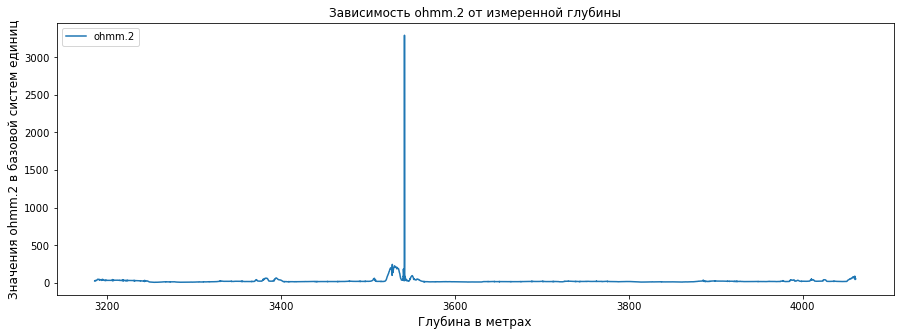

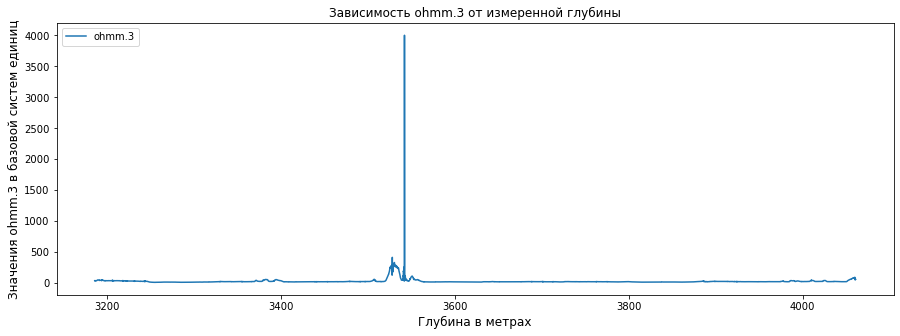

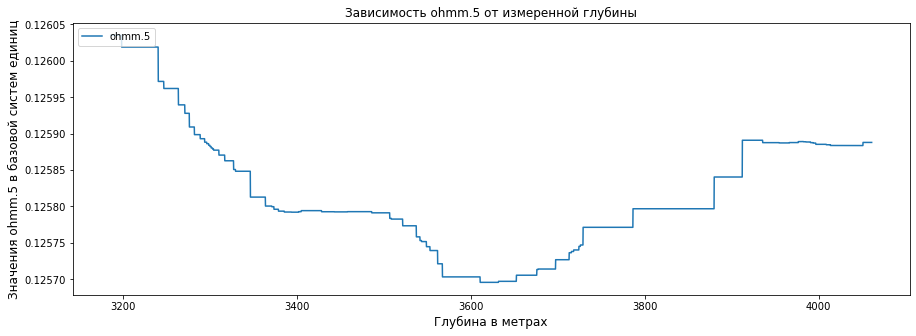

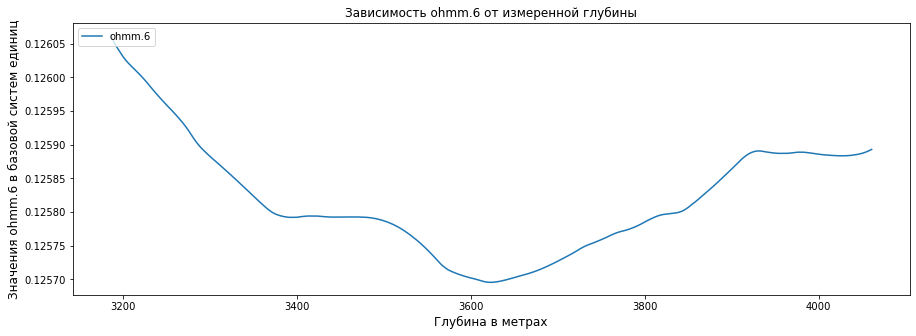

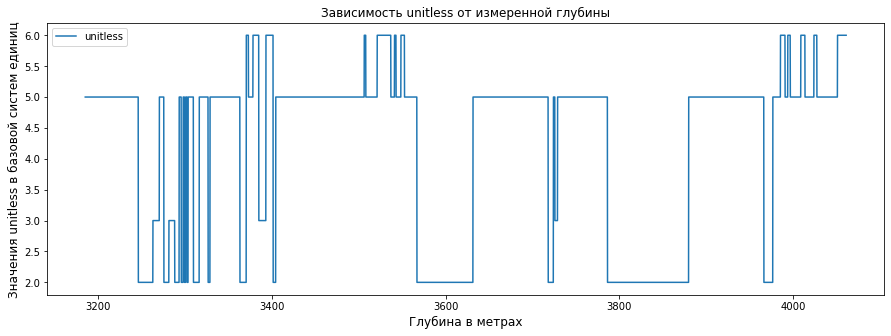

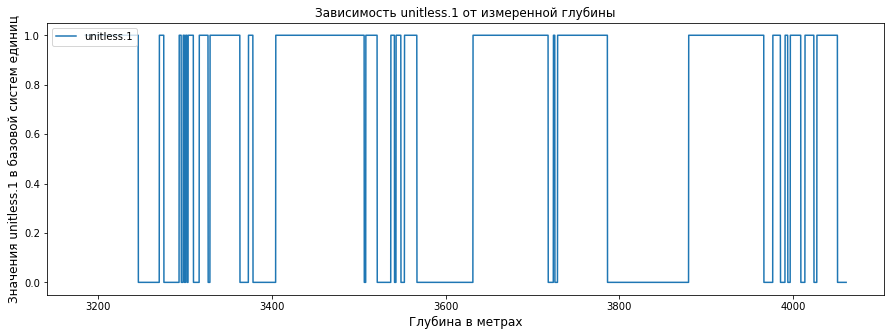

In [19]:
depth_df = dataframe_edited_X['m']
for column in features:
    current_df = dataframe_edited_X[column]
    draft_images(column,depth_df,current_df)

In [20]:
#так нам нельзя использовать данные по пласту - тк. они искуственные. Это столбцы 'ohmm.5' и 'v/v'

In [21]:
dataframe_edited_2_X = dataframe_edited_X.drop(axis=1, labels = ['v/v', 'ohmm.5'])

In [22]:
dataframe_edited_2_X #работаем с этим датасетом далее в блокноте

,m,v/v.1,uR/h,ohmm,ohmm.1,ohmm.2,ohmm.3,ohmm.6,unitless,unitless.1
0,3185.5,0.901756,56.50,38.11802,46.61687,26.52874,36.00038,0.126063,5,1
1,3185.6,0.924199,55.10,38.51000,41.08000,28.23000,30.61000,0.126062,5,1
2,3185.7,0.920993,55.30,38.49500,40.22613,27.25827,29.11342,0.126062,5,1
3,3185.8,0.917787,55.50,38.48000,39.39000,26.32000,27.69000,0.126062,5,1
4,3185.9,0.922435,55.21,37.06394,38.07816,28.97599,30.48858,0.126061,5,1
...,...,...,...,...,...,...,...,...,...,...
8749,4060.4,0.898871,56.68,66.80001,68.99000,55.30000,54.63000,0.125893,6,0
8750,4060.5,0.906886,56.18,70.49768,71.50902,57.49158,58.34378,0.125893,6,0
8751,4060.6,0.914901,55.68,74.40001,74.12000,59.77000,62.31001,0.125893,6,0
8752,4060.7,0.902558,56.45,70.83981,70.74306,56.49531,59.97111,0.125893,6,0


# Тестируем идею с обучением моедил предсказывать данные при помощи регресси по независимым стобцам (обучаем по ur/H, v/v.1, ohmm.1) 

In [23]:
GK_df = np.array(dataframe_edited_2_X['uR/h']) #возьмем колонку с гамма-каротажем
V_V1_df = np.array(dataframe_edited_2_X['v/v.1']) # *что за показатель?!
ohmm1_df = np.array(dataframe_edited_2_X['ohmm.1']) #резестивеметрия

In [24]:
GK_features_number = 7 #сколько точек мы берем для предсказания
GK_features_predict = 1 #сколько точек предсказываем

In [25]:
cells_features_number = len(GK_df)-7 #кол-во возможных комбинаций в данных 
cells_features_number

8747

In [26]:
#содержит лист листов из 7 точек перед предсказываемой точкой (все это в рамках одного столбца)
list_GK_features_7 = []
list_Vv1_features_7 = []
list_ohmm1_features_7 = []

#содержит 1 точку для предсказания (все это в рамках одного столбца)
list_GK_predict_1 = []
list_Vv1_predict_1 = []
list_ohmm1_predict_1 = []

#это для пробежки по списку
counter_first = 0
counter_end = GK_features_number

for i in range(cells_features_number):
    take_samples_GK = GK_df[counter_first:counter_end]
    take_samples_VV1 = V_V1_df[counter_first:counter_end]
    
    take_one_GK = GK_df[counter_end]
    take_one_VV1 = V_V1_df[counter_end]
    take_one_ohmm1 = ohmm1_df[counter_end]
    
    list_GK_features_7.append(take_samples_GK)
    list_Vv1_features_7.append(take_samples_GK)
    list_ohmm1_features_7.append(take_samples_GK)

    
    list_GK_predict_1.append(take_one_GK)
    list_Vv1_predict_1.append(take_one_VV1)
    list_ohmm1_predict_1.append(take_one_ohmm1)
    
    counter_first += GK_features_predict
    counter_end += GK_features_predict

In [27]:
#Теперь надо обучить три модели предсказывать столбцы незасимо друг от друга
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor.predict

reg_GK = GradientBoostingRegressor(random_state=0)
reg_GK.fit(list_GK_features_7[:4000], list_GK_predict_1[:4000])

reg_VV1 = GradientBoostingRegressor(random_state=0)
reg_VV1.fit(list_Vv1_features_7[:4000], list_Vv1_predict_1[:4000])

reg_ohmm1 = GradientBoostingRegressor(random_state=0)
reg_ohmm1.fit(list_ohmm1_features_7[:4000], list_ohmm1_predict_1[:4000])

GradientBoostingRegressor(random_state=0)

# Проверка с помощью MAE, RMSE и графика как регрессия по одному столбцу работает с данными по скважине AA564G 

In [28]:
predicted_value_GK = list(reg_GK.predict(list_GK_features_7[4000:])) #700:
predicted_value_Vv1 = list(reg_VV1.predict(list_Vv1_features_7[4000:]))
predicte_value_ohmm1 = list(reg_ohmm1.predict(list_ohmm1_features_7[4000:]))

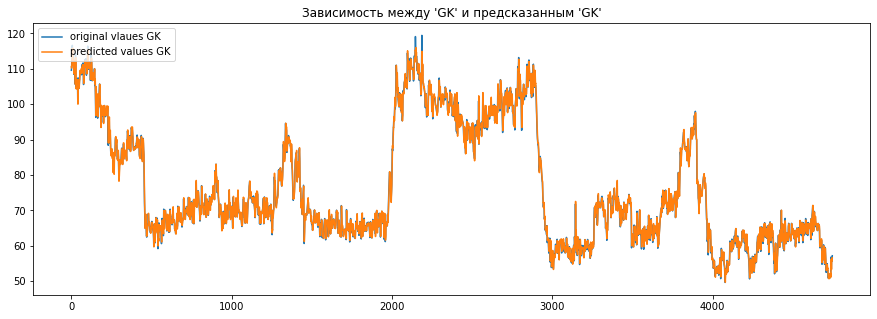

In [29]:
name_column = 'GK'
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title(f"Зависимость между 'GK' и предсказанным 'GK'", fontsize=12)      
ax.plot(list(GK_df[4007:]), label='original vlaues GK')
ax.plot(predicted_value_GK, label='predicted values GK')
ax.legend(loc="upper left")
plt.show()

In [30]:
print(f' GK, RMSE:{RMSE(GK_df[4007:], predicted_value_GK)}')
print(f' GK, MAE:{MAE(GK_df[4007:], predicted_value_GK)}')

 GK, RMSE:1.2867776000966382
 GK, MAE:0.9650741228615506


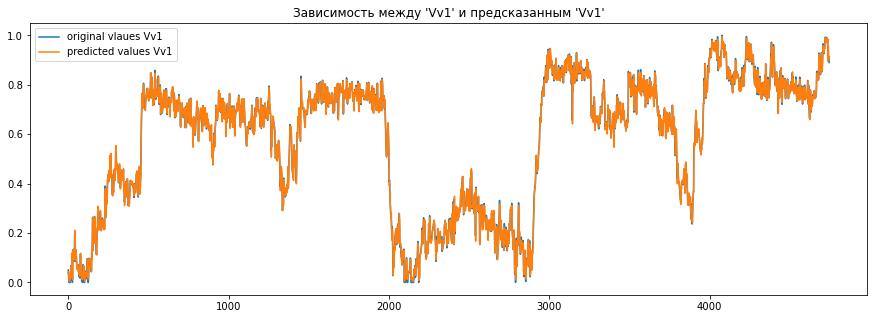

In [31]:
name_column = 'Vv1'
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title(f"Зависимость между 'Vv1' и предсказанным 'Vv1'", fontsize=12)      
ax.plot(list(V_V1_df[4007:]), label='original vlaues Vv1')
ax.plot(predicted_value_Vv1, label='predicted values Vv1')
ax.legend(loc="upper left")
plt.show()

In [32]:
print(f' Vv1, RMSE: {RMSE(V_V1_df[4007:], predicted_value_Vv1)}')
print(f' Vv1, MAE: {MAE(V_V1_df[4007:], predicted_value_Vv1)}')

 Vv1, RMSE: 0.02012594770581424
 Vv1, MAE: 0.015106647968053813


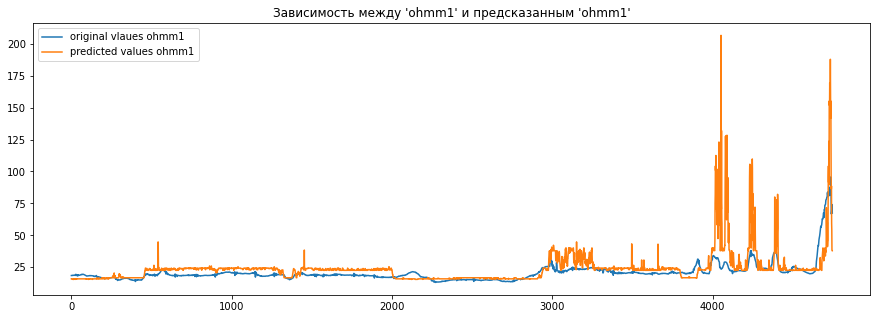

In [33]:
name_column = 'ohmm1'
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title(f"Зависимость между 'ohmm1' и предсказанным 'ohmm1'", fontsize=12)      
ax.plot(list(ohmm1_df[4007:]), label='original vlaues ohmm1')
ax.plot(predicte_value_ohmm1, label='predicted values ohmm1')
ax.legend(loc="upper left")
plt.show()

In [34]:
print(f' ohmm1, RMSE: {RMSE(ohmm1_df[4007:], predicte_value_ohmm1)}')
print(f' ohmm1, MAE: {MAE(ohmm1_df[4007:], predicte_value_ohmm1)}')

 ohmm1, RMSE: 10.798810616574226
 ohmm1, MAE: 5.196441158845233


# Исходя из предсказанных данных по столбцам (ur/H, v/v.1, ohmm.1) классифицирую горные породы на коллектора = 1 и неколлекторы = 0

In [35]:
# predicte_value_ohmm1 - содержит данные по каждой предсказанной точки столбца ohmm1 с настройками 7 точек сзади и 1 впереди
# predicted_value_Vv1 - содержит данные по каждой предсказанной точки столбца Vv1 с настройками 7 точек сзади и 1 впереди
# predicted_value_GK -  содержит данные по каждой предсказанной точки столбца GK с настройками 7 точек сзади и 1 впереди

In [36]:
X_test_classification = [] # содержит предсказанные при помощи регрессии данные по трем столбцам
for i in range(len(predicte_value_ohmm1)):
    ohmm1_value = predicte_value_ohmm1[i] #на каждой итерации нам надо знать значение из списка по всем столбцам
    Vv1_value = predicted_value_Vv1[i] #аналогия...
    GK_value = predicted_value_GK[i]
    temp_values = [ohmm1_value, Vv1_value, GK_value] #создаем список содержащий предсказанные значения по 3 столбцам
    X_test_classification.append(temp_values) #сохраняем найденный список в X_test_classification список

In [37]:
#какие отклики в реальности соответсвуют вышеприведенным данным?  dataframe_edited_2_X['unitless.1'][4007:]
Y_test_classification = np.array(dataframe_edited_2_X['unitless.1'][4007:])

In [38]:
# Теперь необходимо определиться с тренеровочными данными. 
Y_train_classification = np.array(dataframe_edited_2_X['unitless.1'][:4007]) #аналогично предыдущему

In [39]:
X_train_classification = np.array(dataframe_edited_2_X[['ohmm.1','v/v.1','uR/h']][:4007]) #выбрали три столбца из dataframe
#..обработанного и сразу перевели в np.array (к виду трнеровочных данных - аналог тестовых)

In [40]:
#загружаем модель XGboost classifier - 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier.feature_importances_

In [41]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_classification, Y_train_classification)

In [42]:
clf.score(X_test_classification, Y_test_classification) #результат порядка 94% accuracy - отличный тест

0.944807246682115

# Проведу валидацию модели классификации на данных по скважине AA684G

In [43]:
#загрузка данных по скважине AA684G
dataframe_AA684G = dataframe[dataframe[dataframe_columns[0]] == first_label_list[1]]

In [44]:
#dataframe_AA684G ## - для проверки

In [45]:
dataframe_AA684G_first = dataframe_AA684G.drop(axis=1, labels = (dataframe_AA684G.columns[0]), )\
.drop(axis=1, labels = (dataframe_AA684G.columns[1]))\
[['m','v/v','v/v.1','uR/h','ohmm','ohmm.1','ohmm.2','ohmm.3','ohmm.5','ohmm.6','unitless','unitless.1']]\
.reset_index(drop=True)

In [46]:
#dataframe_AA684G_first ##повторная проверка

In [47]:
dataframe_edited_X_AA684G = dataframe_AA684G_first.loc[dataframe_AA684G_first['unitless.1'] >= 0]\
.loc[dataframe_AA684G_first['unitless'] >= 0]\
.loc[dataframe_AA684G_first['ohmm'] >= 0]\
.loc[dataframe_AA684G_first['ohmm.1'] >= 0]\
.loc[dataframe_AA684G_first['ohmm.2'] >= 0]\
.loc[dataframe_AA684G_first['ohmm.3'] >= 0]\
.loc[dataframe_AA684G_first['ohmm.5'] >= 0]\
.loc[dataframe_AA684G_first['ohmm.6'] >= 0]\
.loc[dataframe_AA684G_first['uR/h'] >= 0]\
.loc[dataframe_AA684G_first['v/v.1'] >= 0]\
.loc[dataframe_AA684G_first['v/v'] >= 0]\
.reset_index(drop=True)

In [48]:
Y_AA684G = np.array(dataframe_edited_X_AA684G['unitless.1'])

In [49]:
X_AA684G = np.array(dataframe_edited_X_AA684G[['ohmm.1','v/v.1','uR/h']])

In [50]:
clf.score(X_AA684G, Y_AA684G) #результаты порядка 90% - отличная валидация

0.8992589813338336

# Проведу валидацию модели регрессии на данных по скважине AA684G

In [51]:
GK_AA684G = np.array(dataframe_edited_X_AA684G['uR/h']) #возьмем колонку с гамма-каротажем
V_V1_AA684G = np.array(dataframe_edited_X_AA684G['v/v.1']) # *что за показатель?!
ohmm1_AA684G = np.array(dataframe_edited_X_AA684G['ohmm.1']) #резестивеметрия

In [52]:
GK_features_number = 7 #сколько точек мы берем для предсказания
GK_features_predict = 1 #сколько точек предсказываем

In [53]:
cells_features_number = len(dataframe_edited_X_AA684G)-7 #кол-во возможных комбинаций в данных 
cells_features_number

10654

In [54]:
#содержит лист листов из 7 точек перед предсказываемой точкой (все это в рамках одного столбца)
list_GK_AA684G_features_7 = []
list_Vv1_AA684G_features_7 = []
list_ohmm1_AA684G_features_7 = []

#содержит 1 точку для предсказания (все это в рамках одного столбца)
list_GK_AA684G_predict_1 = []
list_Vv1_AA684G_predict_1 = []
list_ohmm1_AA684G_predict_1 = []

#это для пробежки по списку
counter_first = 0
counter_end = GK_features_number

for i in range(cells_features_number):
    take_samples_GK = GK_AA684G[counter_first:counter_end]
    take_samples_VV1 = V_V1_AA684G[counter_first:counter_end]
    
    take_one_GK = GK_AA684G[counter_end]
    take_one_VV1 = V_V1_AA684G[counter_end]
    take_one_ohmm1 = ohmm1_AA684G[counter_end]
    
    list_GK_AA684G_features_7.append(take_samples_GK)
    list_Vv1_AA684G_features_7.append(take_samples_GK)
    list_ohmm1_AA684G_features_7.append(take_samples_GK)

    
    list_GK_AA684G_predict_1.append(take_one_GK)
    list_Vv1_AA684G_predict_1.append(take_one_VV1)
    list_ohmm1_AA684G_predict_1.append(take_one_ohmm1)
    
    counter_first += GK_features_predict
    counter_end += GK_features_predict

In [55]:
#модель уже обученна на данных - необходимо только проверить

In [56]:
predicted_value_GK_AA684G = list(reg_GK.predict(list_GK_AA684G_features_7))
predicted_value_Vv1_AA684G = list(reg_VV1.predict(list_Vv1_AA684G_features_7))
predicte_value_ohmm1_AA684G = list(reg_ohmm1.predict(list_ohmm1_AA684G_features_7))

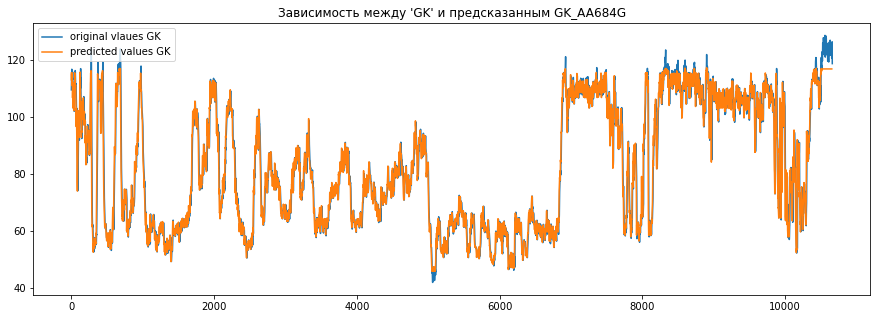

In [57]:
name_column = 'GK_AA684G'
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title(f"Зависимость между 'GK' и предсказанным GK_AA684G", fontsize=12)      
ax.plot(GK_AA684G, label='original vlaues GK') #8747 данных только были обработаны из 10000 - почему?
ax.plot(predicted_value_GK_AA684G, label='predicted values GK')
ax.legend(loc="upper left")
plt.show()

In [58]:
print(f' GK, RMSE:{RMSE(GK_AA684G, predicted_value_GK_AA684G)}')
print(f' GK, MAE:{MAE(GK_AA684G, predicted_value_GK_AA684G)}')

 GK, RMSE:4.819089599128781
 GK, MAE:3.200023496332099


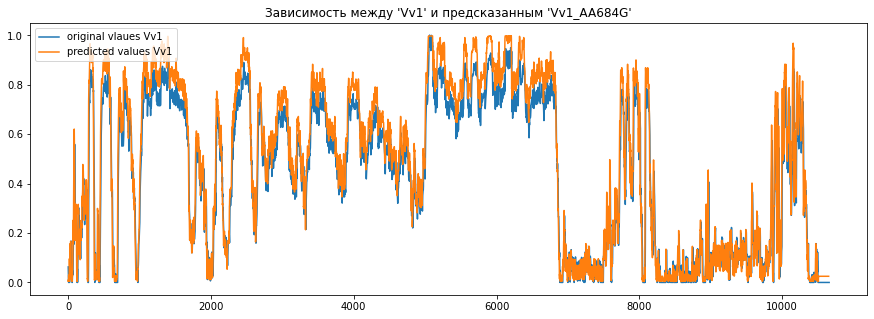

In [59]:
name_column = 'Vv1_AA684G'
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title(f"Зависимость между 'Vv1' и предсказанным 'Vv1_AA684G'", fontsize=12)      
ax.plot(list(V_V1_AA684G), label='original vlaues Vv1')
ax.plot(predicted_value_Vv1_AA684G, label='predicted values Vv1')
ax.legend(loc="upper left")
plt.show()

In [60]:
print(f' GK, RMSE:{RMSE(V_V1_AA684G, predicted_value_Vv1_AA684G)}')
print(f' GK, MAE:{MAE(V_V1_AA684G, predicted_value_Vv1_AA684G)}')

 GK, RMSE:0.09102229213779181
 GK, MAE:0.0703908976075364


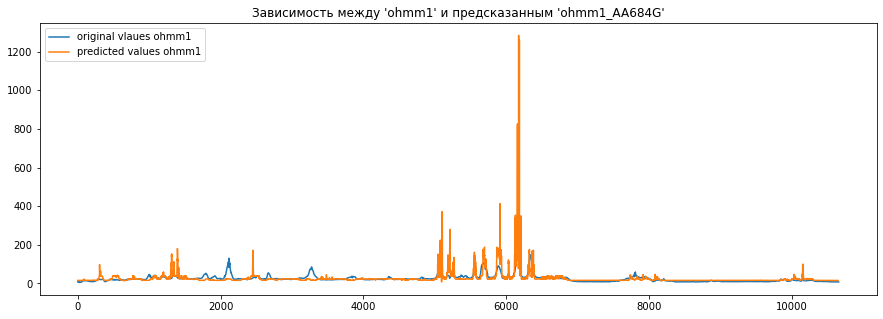

In [61]:
name_column = 'ohmm1_AA684G'
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title(f"Зависимость между 'ohmm1' и предсказанным 'ohmm1_AA684G'", fontsize=12)      
ax.plot(ohmm1_AA684G, label='original vlaues ohmm1')
ax.plot(predicte_value_ohmm1_AA684G, label='predicted values ohmm1')
ax.legend(loc="upper left")
plt.show()

In [62]:
print(f' GK, RMSE:{RMSE(ohmm1_AA684G, predicte_value_ohmm1_AA684G)}')
print(f' GK, MAE:{MAE(ohmm1_AA684G, predicte_value_ohmm1_AA684G)}')

 GK, RMSE:32.32116523438016
 GK, MAE:10.490295839138776


# Проведу валидацию модели классификации на данных предсказанных по скважине AA684G

In [72]:
X_test_classification_AA684G = [] # содержит предсказанные при помощи регрессии данные по трем столбцам
for i in range(len(predicte_value_ohmm1_AA684G)):
    ohmm1_value = predicte_value_ohmm1_AA684G[i] #на каждой итерации нам надо знать значение из списка по всем столбцам
    Vv1_value = predicted_value_Vv1_AA684G[i] #аналогия...
    GK_value = predicted_value_GK_AA684G[i]
    temp_values = [ohmm1_value, Vv1_value, GK_value] #создаем список содержащий предсказанные значения по 3 столбцам
    X_test_classification_AA684G.append(temp_values) #сохраняем найденный список в X_test_classification AA684G список

In [73]:
#какие отклики в реальности соответсвуют вышеприведенным данным? 
Y_test_classification_AA684G = np.array(dataframe_edited_X_AA684G['unitless.1'])

In [76]:
clf.score(X_test_classification_AA684G, Y_test_classification_AA684G[7:]) #результаты порядка 90% - отличная валидация

0.9330767786746762